# U.S. Census Data API in Python

by Avery Fernandez

**U.S. Census API documentation:** https://www.census.gov/data/developers/about.html

**U.S. Census Data Discovery Tool**: https://api.census.gov/data.html

These recipe examples were tested on March 16, 2022.

See also the [U.S. Census API Terms of Service](https://www.census.gov/data/developers/about/terms-of-service.html)

**Attribution**: *This tutorial uses the Census Bureau Data API but is not endorsed or certified by the Census Bureau.*

### API Key Information

While an API key is not required to use the U.S. Census Data API, you may consider registering for an API key as the API is limited to 500 calls a day without a key. Sign up can be found here: https://api.census.gov/data/key_signup.html

This tutorial does not use an API key:

In [1]:
key = ""

However, if you want to add in your API Key, save the API key to a file `api_key` and run the following code:

```python
from api_key import key

```

## 1. Get population estimates of counties by state

*Note: includes Washington, D.C. and Puerto Rico*

First, import several libraries:

In [2]:
from time import sleep
import requests
from pprint import pprint

For obtaining data from the Census API, it is helpful to first obtain a list of state IDs:

In [3]:
# define root Census API
api = 'https://api.census.gov/data/'

# define api url for the state ids
# we will use the Population Estimates from 2019 dataset:
# https://api.census.gov/data/2019/pep/population/examples.html

state_ids = api + "2019/pep/population?get=NAME&for=state:*" + key

# read the url and import JSON data
state_ids = requests.get(state_ids).json()
print(len(state_ids))

53


In [4]:
pprint(state_ids[0:10]) # show first 10

[['NAME', 'state'],
 ['Alabama', '01'],
 ['Alaska', '02'],
 ['Arizona', '04'],
 ['Arkansas', '05'],
 ['California', '06'],
 ['Colorado', '08'],
 ['Delaware', '10'],
 ['District of Columbia', '11'],
 ['Idaho', '16']]


In [5]:
# remove heading
state_ids = state_ids[1:]
pprint(state_ids[0:10])

[['Alabama', '01'],
 ['Alaska', '02'],
 ['Arizona', '04'],
 ['Arkansas', '05'],
 ['California', '06'],
 ['Colorado', '08'],
 ['Delaware', '10'],
 ['District of Columbia', '11'],
 ['Idaho', '16'],
 ['Connecticut', '09']]


Now we can loop through each state and pull their individual population data:

In [6]:
# Extract out ids from the list to create a dictionary of state ids
for states in state_ids: # loops through the list of states
    stateName = states[0] # grabs the name of the state
    # grabs the name of each county and their population
    request = requests.get(api + "2019/pep/population?get=NAME,POP&for=county:*&in=state:"+states[1]+key).json()[1:]
    sleep(1)
    # creates lists to add the populations and counties
    counties = []
    countyPopulation = []
    for county in request: # loops through the json data, extracting the county name and their population
        counties.append(county[0][:-(len(stateName)+2)]) # adds the county's name and deletes the state name from the end of the county string
        countyPopulation.append(int(county[1] or 'nan')) # adds the county's population
    # converts the name of the state into a variable and stores the county data into the given name for easy reference
    globals()[stateName] = {counties[i]: countyPopulation[i] for i in range(len(counties))}

In [7]:
# show data for Alabama
pprint(Alabama)

{'Autauga County': 55869,
 'Baldwin County': 223234,
 'Barbour County': 24686,
 'Bibb County': 22394,
 'Blount County': 57826,
 'Bullock County': 10101,
 'Butler County': 19448,
 'Calhoun County': 113605,
 'Chambers County': 33254,
 'Cherokee County': 26196,
 'Chilton County': 44428,
 'Choctaw County': 12589,
 'Clarke County': 23622,
 'Clay County': 13235,
 'Cleburne County': 14910,
 'Coffee County': 52342,
 'Colbert County': 55241,
 'Conecuh County': 12067,
 'Coosa County': 10663,
 'Covington County': 37049,
 'Crenshaw County': 13772,
 'Cullman County': 83768,
 'Dale County': 49172,
 'Dallas County': 37196,
 'DeKalb County': 71513,
 'Elmore County': 81209,
 'Escambia County': 36633,
 'Etowah County': 102268,
 'Fayette County': 16302,
 'Franklin County': 31362,
 'Geneva County': 26271,
 'Greene County': 8111,
 'Hale County': 14651,
 'Henry County': 17205,
 'Houston County': 105882,
 'Jackson County': 51626,
 'Jefferson County': 658573,
 'Lamar County': 13805,
 'Lauderdale County': 9272

## 2. Get population estimates over a range of years

We can use similar code as before, but now loop through different population estimate datasets by year. Here are the specific APIs used:

Vintage 2015 Population Estimates: https://api.census.gov/data/2015/pep/population/examples.html

Vintage 2016 Population Estimates: https://api.census.gov/data/2016/pep/population/examples.html

Vintage 2017 Population Estimates: https://api.census.gov/data/2017/pep/population/examples.html

In [8]:
# first we must clear the global variables
for states in state_ids:
    stateName = states[0]
    try:
        del globals()[stateName]
    except:
        pass
    globals()[stateName] = {}

In [9]:
for years in range(2015,2018): # goes through datasets for 2015,2016,2017
    for states in state_ids: # using the state_ids from earlier
        stateName = states[0]
        request = requests.get(api+str(years)+"/pep/population?get=GEONAME,POP&for=county:*&in=state:"+states[1]+key).json()[1:]
        sleep(1)
        counties = []
        countyPopulation = []
        for county in request:
            counties.append((county[0]).split(", ")[0])
            countyPopulation.append(int(county[1] or 'nan'))
        globals()[stateName][years] = {counties[i]: countyPopulation[i] for i in range(len(counties))}

In [10]:
# show Alabama data
pprint(Alabama)

{2015: {'Autauga County': 55347,
        'Baldwin County': 203709,
        'Barbour County': 26489,
        'Bibb County': 22583,
        'Blount County': 57673,
        'Bullock County': 10696,
        'Butler County': 20154,
        'Calhoun County': 115620,
        'Chambers County': 34123,
        'Cherokee County': 25859,
        'Chilton County': 43943,
        'Choctaw County': 13170,
        'Clarke County': 24675,
        'Clay County': 13555,
        'Cleburne County': 15018,
        'Coffee County': 51211,
        'Colbert County': 54354,
        'Conecuh County': 12672,
        'Coosa County': 10724,
        'Covington County': 37835,
        'Crenshaw County': 13963,
        'Cullman County': 82005,
        'Dale County': 49565,
        'Dallas County': 41131,
        'DeKalb County': 71130,
        'Elmore County': 81468,
        'Escambia County': 37789,
        'Etowah County': 103057,
        'Fayette County': 16759,
        'Franklin County': 31696,
        'Geneva Co

## 3. Plot Population Change

This data is based off the 2021 Population Estimates dataset:

https://api.census.gov/data/2021/pep/population/variables.html

The percentage change in population is from July 1, 2020 to July 1, 2021 for states (includes Washington, D.C. and Puerto Rico)

In [11]:
request = requests.get(api+"2021/pep/population?get=NAME,POP_2021,PPOPCHG_2021&for=state:*"+key).json()[1:]
request.sort()
print(len(request)) # shows the size of data

52


In [12]:
pprint(request[0:10]) # shows first 10

[['Alabama', '5039877', '0.2999918604', '01'],
 ['Alaska', '732673', '0.0316749062', '02'],
 ['Arizona', '7276316', '1.3698828613', '04'],
 ['Arkansas', '3025891', '0.4534511286', '05'],
 ['California', '39237836', '-0.6630474360', '06'],
 ['Colorado', '5812069', '0.4799364073', '08'],
 ['Connecticut', '3605597', '0.1482392938', '09'],
 ['Delaware', '1003384', '1.1592057958', '10'],
 ['District of Columbia', '670050', '-2.9043911470', '11'],
 ['Florida', '21781128', '0.9791222337', '12']]


In [13]:
# prepare data for plotting
stateName = []
population = []
populationChange = []
for states in request:
    stateName.append(states[0])
    population.append(int(states[1]) or 'nan')
    populationChange.append(float(states[2] or 'nan'))

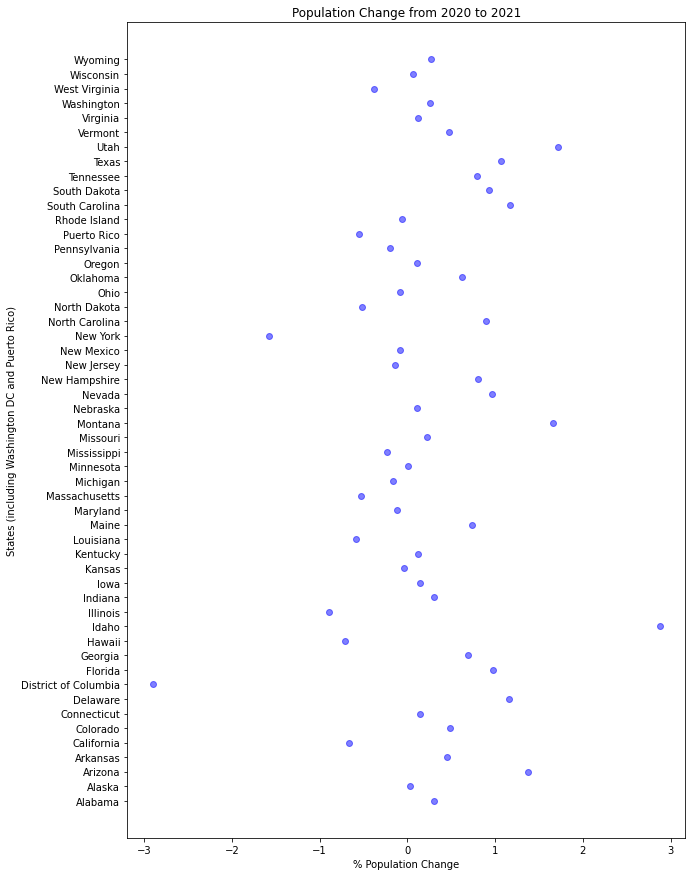

In [14]:
# plot data
import matplotlib.pyplot as plt
plt.figure(figsize=(10,15))
plt.scatter(populationChange, stateName, c="blue", alpha=0.5, label="states")
plt.title("Population Change from 2020 to 2021", c="k")
plt.xlabel("% Population Change",c="k")
plt.ylabel("States (including Washington DC and Puerto Rico)")
plt.show()